In [15]:
from skimage.io import imread,imsave,imshow
from skimage.transform import resize

im1=imread('Input/Images/eiffel.jpg')
im2=imread('Input/Images/purse.png')



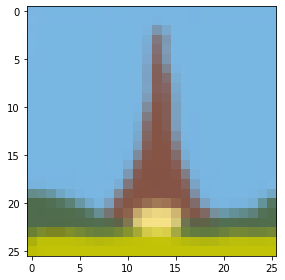

In [19]:
im=imread('Input/Paint/eiffel_paint.png')
im=resize(im,(26,26))
imshow(im)

In [38]:
img=imread('Input/Images/purse.jpg')
imsave('Input/Images/purse.png',img)

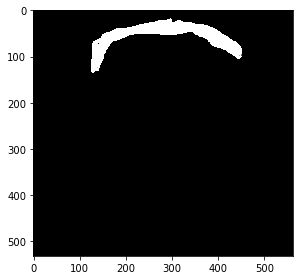

In [40]:
diff=abs(im1-im2[:,:,:3])

diff[diff!=0]=1
imshow(diff*255)

In [41]:
imsave('Input/Editing/purse_ref_mask.png',diff)

<ipython-input-41-d927a93c4c28>:1: UserWarning: Input/Editing/purse_ref_mask.png is a low contrast image
  imsave('Input/Editing/purse_ref_mask.png',diff)


In [32]:
mask=imread('Input/Editing/eiffel_ref_mask.png')

In [13]:
from sklearn.cluster import KMeans

def quant2centers(paint, centers):
    kmeans = KMeans(n_clusters=5, init=centers, n_init=1).fit(arr)
    labels = kmeans.labels_
    #centers = kmeans.cluster_centers_
    x = centers[labels]
    x = torch.from_numpy(x)
    x = move_to_gpu(x)
    x = x.type(torch.cuda.FloatTensor) if torch.cuda.is_available() else x.type(torch.FloatTensor)
    #x = x.type(torch.cuda.FloatTensor)
    x = x.reshape(paint.shape)
    return x

    return paint
prev=im2
for k in range(2,8):
    arr = prev.reshape((-1, 3))
    kmeans = KMeans(n_clusters=k, random_state=0).fit(arr)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    x = centers[labels]
    quant= x.reshape(prev.shape)
    imsave(f'Output/quant/purse{k}.png',quant)




Lossy conversion from float64 to uint8. Range [154.35836712835552, 248.30585133667034]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [109.42729641694618, 251.9961955207563]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [79.0001438538508, 253.70741808753024]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [70.3643105228654, 254.06431061745252]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [49.81046034147363, 254.22474342904994]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [41.05836322138862, 254.29932514510884]. Convert image to uint8 prior to saving to suppress this warning.


In [12]:
imsave('quant.png',quant)

Lossy conversion from float64 to uint8. Range [79.00014385385083, 253.70741808753021]. Convert image to uint8 prior to saving to suppress this warning.


In [1]:
import torch

reals=torch.load('TrainedModels/eiffel/scale_factor=0.750000,alpha=10/reals.pth')

In [2]:
for r in reals:
    print(r.shape)

torch.Size([1, 3, 26, 26])
torch.Size([1, 3, 33, 33])
torch.Size([1, 3, 42, 42])
torch.Size([1, 3, 54, 54])
torch.Size([1, 3, 70, 70])
torch.Size([1, 3, 90, 90])
torch.Size([1, 3, 117, 117])
torch.Size([1, 3, 150, 150])
torch.Size([1, 3, 194, 194])
torch.Size([1, 3, 250, 250])


In [3]:
len(reals)

10